# Kelompok 2 C1'20
-----------------------
##### - Didi Nur Rahmad
##### - Olivia Oktavi Utami
##### - Rizki Andryanti

## 1. Import Library

In [2]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator

## 2. Membaca Dataset

In [3]:
train = r'Datasets/furniture-images/img/train'
val = r'Datasets/furniture-images/img/val'

## 3. Visualisasi
##### Memvisualisasikan dataset dengan PIE Chart

In [4]:
root_path = r'Datasets'
source_path = os.path.join(root_path, 'furniture-images/img/train')

dataset_info = {}
for label in os.listdir(source_path):
    dataset_info[label] = [file for file in os.listdir(
        os.path.join(source_path, label))]

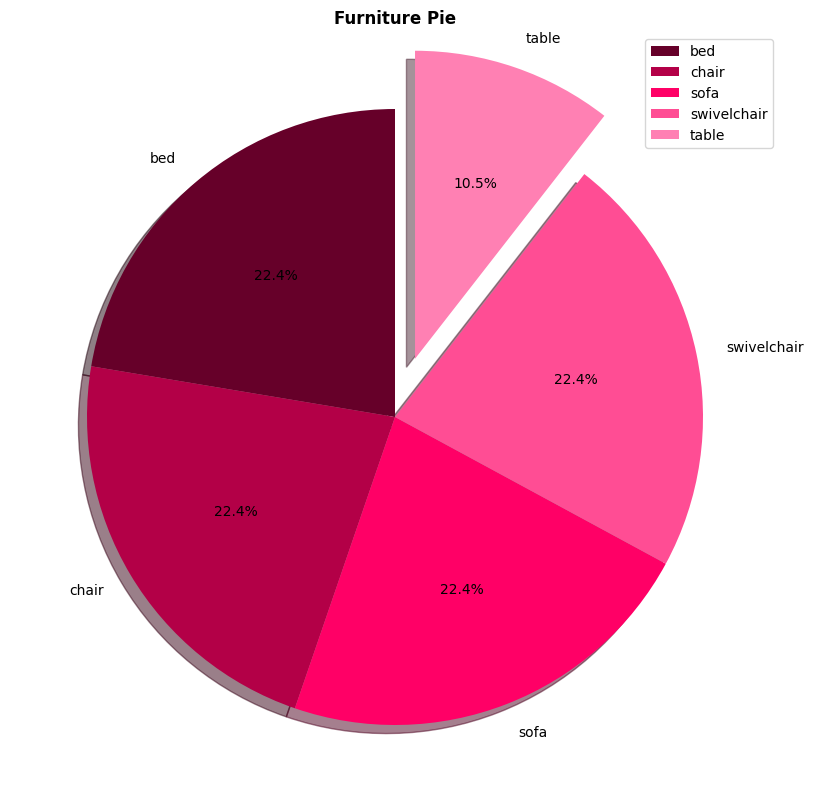

In [5]:
plt.figure(figsize=(10, 10))
plt.pie([len(files) for files in dataset_info.values()],
        labels=dataset_info.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0.2],
        shadow=True,
        colors=['#660029', '#b30047', '#ff0066', '#ff4d94', '#ff80b3'])
plt.title('Furniture Pie', fontweight='bold')
plt.legend()
plt.show()

## 4. Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # horizontal_flip = True,
    rotation_range= 30,
    # shear_range=.2,
    zoom_range=.2,
    # fill_mode='nearest'
    )
train_generator = train_datagen.flow_from_directory(
    train,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val,
    batch_size=64,
    shuffle=True,
    # mengubah resolusi seluruh gambar menjadi 150x100 piksel
    target_size=(150, 150),
    class_mode='categorical'
)

Found 4024 images belonging to 5 classes.
Found 423 images belonging to 5 classes.


In [7]:
image, lable = train_generator.next()

#### Sample Image

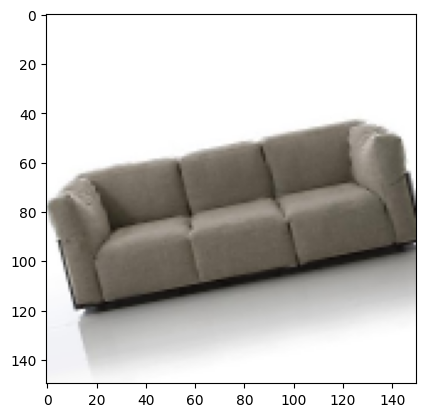

In [8]:
plt.imshow(image[1])
plt.show()

## 5. Membuat Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [13]:
# from tensorflow.keras.optimizers import RMSprop
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Melatih Model

In [14]:
# latih model dengan model.fit
hasil = model.fit(train_generator,validation_data = val_generator, epochs=15)


Epoch 1/15
126/126 [==============================] - 215s 2s/step - loss: 1.4955 - accuracy: 0.4222 - val_loss: 1.2151 - val_accuracy: 0.5343
Epoch 2/15
126/126 [==============================] - 193s 2s/step - loss: 1.0698 - accuracy: 0.6004 - val_loss: 0.9237 - val_accuracy: 0.6147
Epoch 3/15
126/126 [==============================] - 240s 2s/step - loss: 0.9397 - accuracy: 0.6491 - val_loss: 0.8755 - val_accuracy: 0.6667
Epoch 4/15
126/126 [==============================] - 217s 2s/step - loss: 0.8030 - accuracy: 0.7048 - val_loss: 0.7143 - val_accuracy: 0.7305
Epoch 5/15
126/126 [==============================] - 187s 1s/step - loss: 0.7382 - accuracy: 0.7371 - val_loss: 0.7248 - val_accuracy: 0.7423
Epoch 6/15
126/126 [==============================] - 186s 1s/step - loss: 0.6906 - accuracy: 0.7450 - val_loss: 0.6873 - val_accuracy: 0.7660
Epoch 7/15
126/126 [==============================] - 181s 1s/step - loss: 0.6529 - accuracy: 0.7679 - val_loss: 0.8304 - val_accuracy: 0.7305

## Visualisasi Hasil Training

In [15]:
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']

#validation                                 
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

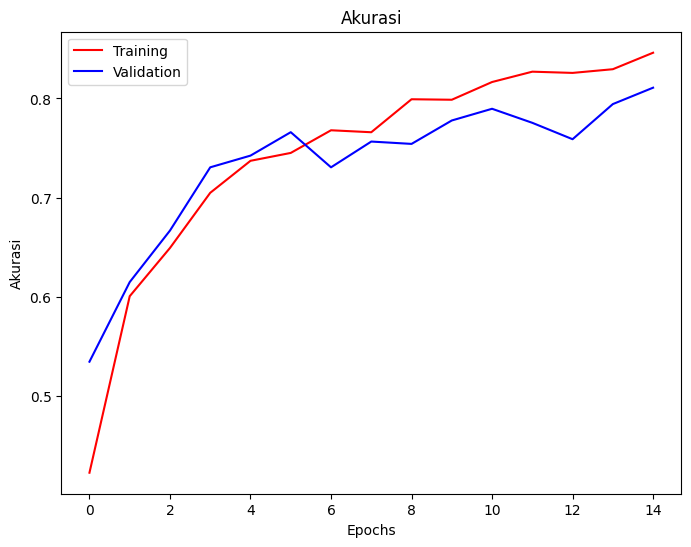

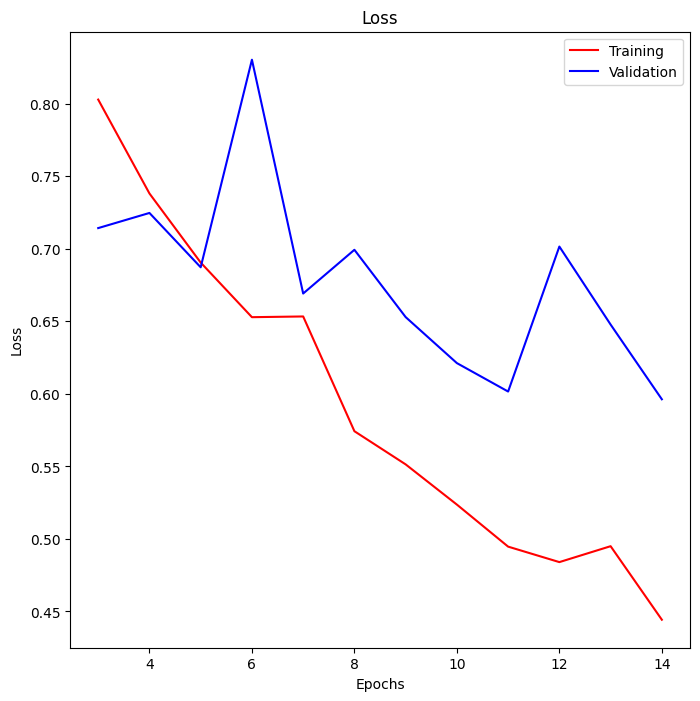

In [16]:
plt.figure(1, figsize=(8,6))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(8,8))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()